In [ ]:
1. trees.csv를 읽어들여서 아래에 대해
1) 상관관계, 다중공선성을 확인하시요
2) crossvalidation score 를 구하시요.
3) 아래의 데이터를 이용하여 Volume을 예측하시요
Girth 8.8, 10.5
Height 63, 72

2. volume이 40 이상이면 크다
30이상이면 보통 미만이면 적음으로
아래와 같이 출력하시요
volume  정도
============
 10.3    적음
...

3. Height  가 가장 작은값과 큰값을
구하시요

4. girth(테두리) 가 가장큰 top5를
구하시요(girth, height, volume)

05:25분까지 제출 팀별 1개씩
17:45분


1조.ipynb

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor #LinearRegression(공식).SGDregressor(학습_경사하강법)
from sklearn.neural_network import MLPRegressor #학습을 통해 만들어짐(딥러닝)
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

from sklearn.metrics import r2_score# 선형 모델(Linear Models)
from sklearn.datasets import load_boston, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # 연속변수의 표준화
from sklearn.preprocessing import LabelEncoder # 범주형 변수 수치화

from sklearn.pipeline import make_pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor #vif

import seaborn as sb

In [3]:
data=pd.read_csv('../data/trees.csv')
data.head()

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [4]:
x_data=data[["Girth","Height"]]
y_data=data[['Volume']]

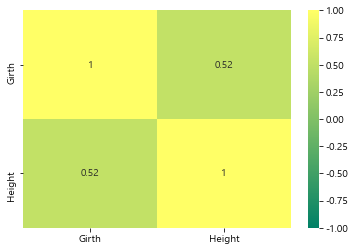

In [6]:
sb.heatmap(x_data.corr(),annot=True, cmap="summer", vmin=-1, vmax=1)
plt.show()

In [7]:
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_data.values, i )  for i in range( x_data.shape[1] ) ]
vif['features'] = x_data.columns
vif

,VIF Factor,features
0,25.633257,Girth
1,25.633257,Height


1. trees.csv를 읽어들여서 아래에 대해
1) 상관관계, 다중공선성을 확인하시요
2) crossvalidation score 를 구하시요.
3) 아래의 데이터를 이용하여 Volume을 예측하시요
Girth 8.8, 10.5
Height 63, 72

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

In [9]:
model=make_pipeline(StandardScaler(),LinearRegression() )
model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [12]:
kfold = KFold( n_splits=5, shuffle=True)
# tree_s=cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
tree_s=cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
print(tree_s)
print(tree_s.mean())

[0.58366522 0.94278568 0.58818264 0.93891028 0.95601278]
0.8019113206616655


In [13]:
p=model.predict([[8.8,63],[10.5,72]])
p

array([[ 5.84983575],
       [16.27579072]])

In [ ]:
2. volume이 40 이상이면 크다
30이상이면 보통 미만이면 적음으로
아래와 같이 출력하시요
volume  정도
============
 10.3    적음
...

### numpy solution

In [19]:
v = data['Volume'].values

In [21]:
result = np.select( [ v>=40,v>=30,v<30 ], ['크다', '보통','적음'])

In [34]:
print( 'volume', '정도', sep='\t')
print( "==================")
for a,b in np.hstack( [v.reshape( -1,1), result.reshape( -1,1)] ):
    print( a, b ,sep='\t')

volume	정도
10.3	적음
10.3	적음
10.2	적음
16.4	적음
18.8	적음
19.7	적음
15.6	적음
18.2	적음
22.6	적음
19.9	적음
24.2	적음
21.0	적음
21.4	적음
21.3	적음
19.1	적음
22.2	적음
33.8	보통
27.4	적음
25.7	적음
24.9	적음
34.5	보통
31.7	보통
36.3	보통
38.3	보통
42.6	크다
55.4	크다
55.7	크다
58.3	크다
51.5	크다
51.0	크다
77.0	크다


#### hstack vstack sample

In [35]:
arr1 = np.array( [[1,2],[3,4]])
arr2 = np.array( [[5,6],[7,8]])

In [36]:
np.hstack( [arr1,arr2])

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [37]:
np.vstack( [arr1,arr2])

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

### pandas solution

In [41]:
def fn( v):
    if v>=40:
        return '크다'
    elif v>=30:
        return '보통'
    else:
        return '적음'

In [43]:
result = data['Volume'].apply( fn )
result

0     적음
1     적음
2     적음
3     적음
4     적음
5     적음
6     적음
7     적음
8     적음
9     적음
10    적음
11    적음
12    적음
13    적음
14    적음
15    적음
16    보통
17    적음
18    적음
19    적음
20    보통
21    보통
22    보통
23    보통
24    크다
25    크다
26    크다
27    크다
28    크다
29    크다
30    크다
Name: Volume, dtype: object

In [44]:
data['정도'] = result

In [46]:
data[['Volume','정도']]

,Volume,정도
0,10.3,적음
1,10.3,적음
2,10.2,적음
3,16.4,적음
4,18.8,적음
5,19.7,적음
6,15.6,적음
7,18.2,적음
8,22.6,적음
9,19.9,적음


3. Height  가 가장 작은값과 큰값을
구하시요

In [49]:
data['Height'].max()

87

In [50]:
data['Height'].min()

63

4. girth(테두리) 가 가장큰 top5를
구하시요(girth, height, volume)

In [55]:
data.nlargest(5,'Girth' )[['Girth','Height','Volume']]

,Girth,Height,Volume
30,20.6,87,77.0
28,18.0,80,51.5
29,18.0,80,51.0
27,17.9,80,58.3
26,17.5,82,55.7
